# SI toy model

***

In [1]:
import requests
import random
import networkx as nx
import matplotlib.pyplot as plt

***

## Exercise 20.2 from SNA

Implement an SI model on the network at `http://www.networkatlas.eu/exercises/20/2/data.txt`. Run it 10 times with different β values: 0.05, 0.1, and 0.2. For each run (in this and all following questions) pick a random node and place it in the Infected state. What’s the average time step in which each of those β infects 80% of the network?

In [2]:
# define parameters
betas = [0.05, 0.1, 0.2]
threshold = 0.8

# get network data (edgelist)
url = "https://www.networkatlas.eu/exercises/20/2/data.txt"
data = requests.get(url).text
data = data.split("\n")
data = data[:-1]
edgelist = [[int(x) for x in edge.split("\t")] for edge in data]
nodelist = list(set([node for edge in edgelist for node in edge]))

In [3]:
G_orig = nx.Graph()
G_orig.add_edges_from(edgelist)
len(G_orig.edges)

4132

In [4]:
assert len([c for c in nx.connected_components(G_orig)]) == 1 , "More than 1 component!"
assert all([edge==sorted(edge) for edge in edgelist]), "Edges in different directions!"

In [5]:
## implement "manually"

# set parameters
maxtime = 150
N = len(nodelist)

# plant a random seed
random.seed(1312)

# for each beta value,

res = {}

for beta in betas:

    # initiate dictionary keeping track of infected nodes
    d = {}
    for edge in edgelist:
        for node in edge:
            if not node in d:
                d[node] = []
        d[edge[0]].append(edge[1])
        d[edge[1]].append(edge[0])
    # now d contains key: value pairs; key = node id, value = list of node's neighbours

    # initiate dictionary keeping track of runs
    runs = {}

    for run in range(10):

        # start clock
        time = 0
        infected = []
        ratios = []
        neighbours = []

        # at t0, 
        # infect patient zero
        patient_zero = random.choice(list(d.keys()))
        
        # update neighbours, infected, and ratios
        infected.append(patient_zero)
        ratios.append(1/N)

        time += 1

        # at each timestep,
        while time < maxtime:

            new_infections = []

            # for each node, check number of infected neighbours
            for node in nodelist:
                nin = len(
                    set(d[node]).intersection(set(infected))
                )
                if nin:
                    if random.uniform(0,1) < beta * nin:
                        new_infections.append(node)
            # add infected at timestep t
            if new_infections:
                infected += new_infections
                infected = list(set(infected)) #... and deduplify
                
            ratio = round(len(set(infected)) / N, 6)
            ratios.append(ratio)

            # if ratio > threshold:
            #     print(f"b={beta}, thresh={threshold}, run={run} Threshold reached at timestep {time}")
            #     # break
            if len(set(infected))==N:
                print(f"b={beta}, thresh={threshold}, run={run} All nodes infected at timestep {time}")
                break
            time +=1

        runs[run] = ratios.copy() # save ratios as result in runs dict

        del time, infected, ratios, neighbours

    res[beta] = runs.copy()

b=0.1, thresh=0.8, run=0 All nodes infected at timestep 132
b=0.1, thresh=0.8, run=1 All nodes infected at timestep 111
b=0.1, thresh=0.8, run=2 All nodes infected at timestep 91
b=0.1, thresh=0.8, run=3 All nodes infected at timestep 117
b=0.1, thresh=0.8, run=5 All nodes infected at timestep 105
b=0.1, thresh=0.8, run=6 All nodes infected at timestep 110
b=0.1, thresh=0.8, run=7 All nodes infected at timestep 99
b=0.1, thresh=0.8, run=8 All nodes infected at timestep 99
b=0.1, thresh=0.8, run=9 All nodes infected at timestep 103
b=0.2, thresh=0.8, run=0 All nodes infected at timestep 58
b=0.2, thresh=0.8, run=1 All nodes infected at timestep 53
b=0.2, thresh=0.8, run=2 All nodes infected at timestep 50
b=0.2, thresh=0.8, run=3 All nodes infected at timestep 67
b=0.2, thresh=0.8, run=4 All nodes infected at timestep 59
b=0.2, thresh=0.8, run=5 All nodes infected at timestep 51
b=0.2, thresh=0.8, run=6 All nodes infected at timestep 50
b=0.2, thresh=0.8, run=7 All nodes infected at tim

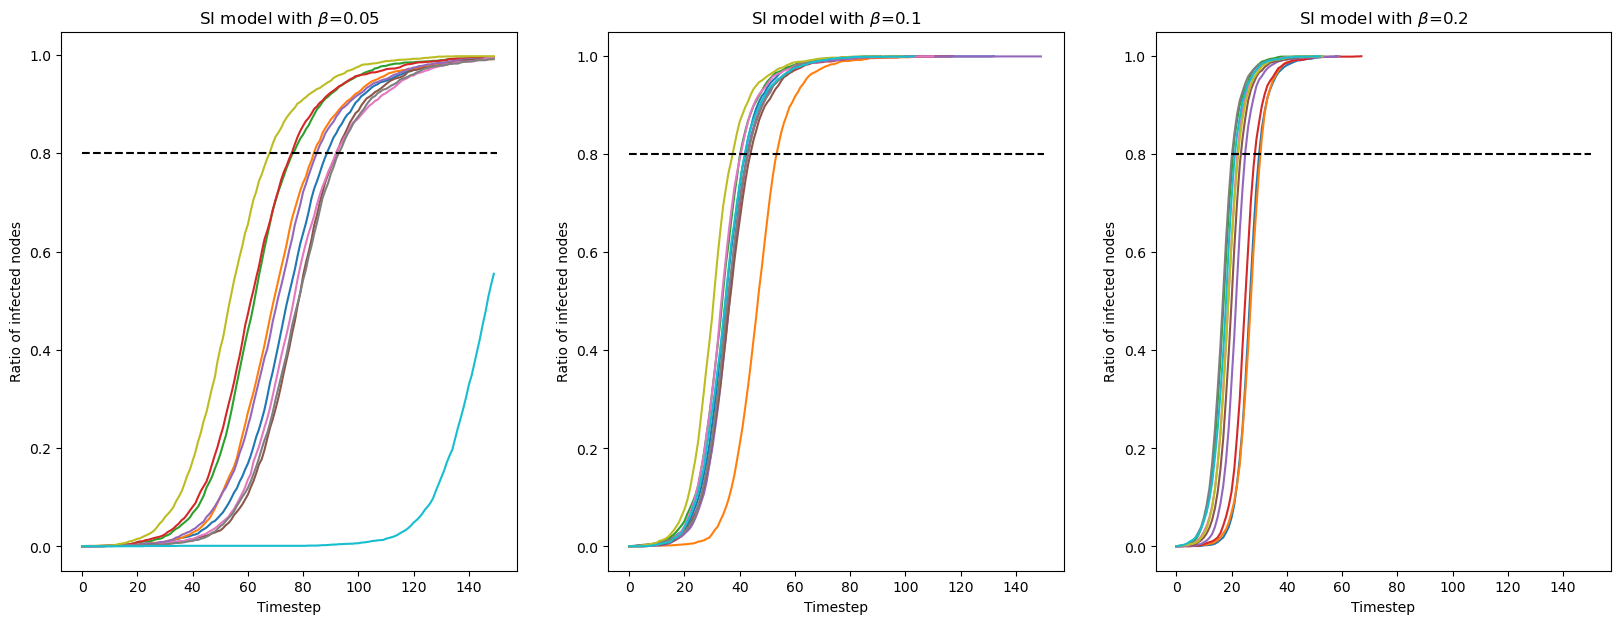

In [6]:
fig, axs = plt.subplots(1,3, figsize=(20,7))

for i in range(3):

    beta = betas[i]
    ax = axs[i]

    for k, v in res[beta].items():
        ax.plot(v, label = k)
    ax.hlines(xmin=0, xmax=maxtime,y=0.8, linestyle="dashed", color = "black")
    #ax.legend()
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Ratio of infected nodes")
    ax.set_title(f"SI model with $\\beta$={betas[i]}")

plt.show()

<BarContainer object of 11 artists>

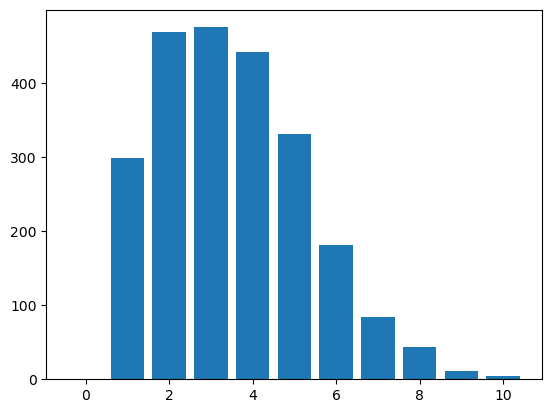

In [7]:
h = nx.degree_histogram(G_orig)
plt.bar([i for i in range(len(h))], h)

***

Snippets:

In [8]:
# for node in G.nodes:
#     assert sorted(d[node]) == sorted(list(nx.neighbors(G, node)))

In [9]:
# e = {}
# count_sorted = 0
# count_reverse = 0

# for edge in edgelist:
#     if edge == sorted(edge):
#         count_sorted += 1
#     elif edge == sorted(edge, reverse=True):
#         count_reverse += 1
#     else:
#         print("Wrong")

# print(count_reverse, count_sorted)